#Fase Final

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Librerías para las bases de datos
import pandas as pd
import numpy as np

# Leer la base de datos
df=pd.read_csv("/malaria-death-rates-by-age.csv")

df.head()

,Entity,Code,Year,Deaths - Malaria - Sex: Both - Age: Under 5 (Rate),Deaths - Malaria - Sex: Both - Age: All Ages (Rate),Deaths - Malaria - Sex: Both - Age: 70+ years (Rate),Deaths - Malaria - Sex: Both - Age: 50-69 years (Rate),Deaths - Malaria - Sex: Both - Age: 15-49 years (Rate),Deaths - Malaria - Sex: Both - Age: 5-14 years (Rate),Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,1.029599,0.817735,1.516249,1.439054,0.957977,0.092253,0.834998
1,Afghanistan,AFG,1991,1.747504,1.504490,3.207005,2.829536,1.737016,0.179641,1.573445
2,Afghanistan,AFG,1992,1.753419,1.646066,3.551868,3.151452,1.953010,0.215286,1.751057
3,Afghanistan,AFG,1993,0.721311,0.673213,1.365095,1.240190,0.816316,0.089092,0.713930
4,Afghanistan,AFG,1994,1.454504,1.258272,2.547663,2.351891,1.488367,0.164952,1.351071


In [8]:
# Creación de una nueva base de datos con los países asignados: Argentina,
# Azerbaijan y Belize
mispaises = df[df.Code.isin(["ARG","AZE","BLZ"])]
mispaises

,Entity,Code,Year,Deaths - Malaria - Sex: Both - Age: Under 5 (Rate),Deaths - Malaria - Sex: Both - Age: All Ages (Rate),Deaths - Malaria - Sex: Both - Age: 70+ years (Rate),Deaths - Malaria - Sex: Both - Age: 50-69 years (Rate),Deaths - Malaria - Sex: Both - Age: 15-49 years (Rate),Deaths - Malaria - Sex: Both - Age: 5-14 years (Rate),Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate)
240,Argentina,ARG,1990,0.004110,0.027892,0.129406,0.048037,0.025242,0.002577,0.028956
241,Argentina,ARG,1991,0.003754,0.026123,0.118835,0.044956,0.023730,0.002415,0.026982
242,Argentina,ARG,1992,0.003314,0.024924,0.111365,0.042727,0.022748,0.002287,0.025561
243,Argentina,ARG,1993,0.002968,0.023476,0.102573,0.039732,0.021644,0.002137,0.023904
244,Argentina,ARG,1994,0.002689,0.021981,0.092928,0.036653,0.020607,0.001902,0.022267
...,...,...,...,...,...,...,...,...,...,...
595,Belize,BLZ,2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
596,Belize,BLZ,2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
597,Belize,BLZ,2017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
598,Belize,BLZ,2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
# Verificación de que la nueva base de datos solo contenga los países asignados.
mispaises["Entity"].unique()

array(['Argentina', 'Azerbaijan', 'Belize'], dtype=object)

In [10]:
# Vector con la población total de los 4 países (ARG, AZE, BGD, BLE) desde 1990
# hasta el 2019.
popmispaises = [32530000,32970000,33420000,33917000,34353000,34779000,35196000,35604000,36005000,36399000,36784000,37156000,37516000,37870000,38226000,38592000,38971000,39356000,39746000,40134000,40788000,41261000,41733000,42203000,42670000,43132000,43590000,44045000,44495000,44939000,7175200,7271300,7459000,7487000,7597000,7726200,7799800,7876700,7949300,8016200,8081000,8141400,8202500,8265700,8347300,8436400,8532700,8629900,8896900,8997586,9111078,9235085,9356483,9477119,9593038,9705643,9809981,9898085,9981457,10067108,189000,194000,199000,205000,211000,217000,222000,230000,239000,243000,250000,256000,263000,269000,276000,284000,291000,299000,307000,315000,322000,332000,341000,350000,359000,368000,378000,388000,398000,408000]

# Creación de una nueva columna en la base de datos 'mispaises' llamada
# Total_Population y con asignación al vector de población.
mispaises = mispaises.assign(Total_Population = popmispaises)
mispaises

,Entity,Code,Year,Deaths - Malaria - Sex: Both - Age: Under 5 (Rate),Deaths - Malaria - Sex: Both - Age: All Ages (Rate),Deaths - Malaria - Sex: Both - Age: 70+ years (Rate),Deaths - Malaria - Sex: Both - Age: 50-69 years (Rate),Deaths - Malaria - Sex: Both - Age: 15-49 years (Rate),Deaths - Malaria - Sex: Both - Age: 5-14 years (Rate),Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate),Total_Population
240,Argentina,ARG,1990,0.004110,0.027892,0.129406,0.048037,0.025242,0.002577,0.028956,32530000
241,Argentina,ARG,1991,0.003754,0.026123,0.118835,0.044956,0.023730,0.002415,0.026982,32970000
242,Argentina,ARG,1992,0.003314,0.024924,0.111365,0.042727,0.022748,0.002287,0.025561,33420000
243,Argentina,ARG,1993,0.002968,0.023476,0.102573,0.039732,0.021644,0.002137,0.023904,33917000
244,Argentina,ARG,1994,0.002689,0.021981,0.092928,0.036653,0.020607,0.001902,0.022267,34353000
...,...,...,...,...,...,...,...,...,...,...,...
595,Belize,BLZ,2015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,368000
596,Belize,BLZ,2016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,378000
597,Belize,BLZ,2017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,388000
598,Belize,BLZ,2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,398000


In [11]:
# Creación de una nueva columma con nombre 'Total_Deaths' y se le asigna el
# valor de None.
mispaises = mispaises.assign(Total_Deaths=None)

# Se calcula las muertes totales al multiplicar la tasa de mortalidad y la
# población total dividia entre 10000.
# Se le asigna el resultado de esa operación a la columna de Total_Deaths.
mispaises['Total_Deaths'] = mispaises['Deaths - Malaria - Sex: Both - Age: All Ages (Rate)'] * mispaises['Total_Population'] / 100000
mispaises["Total_Deaths"]

240    9.073138
241    8.612766
242    8.329644
243    7.962364
244    7.551212
         ...   
595    0.000000
596    0.000000
597    0.000000
598    0.000000
599    0.000000
Name: Total_Deaths, Length: 90, dtype: float64

In [12]:
mispaises.groupby("Entity")['Total_Deaths'].sum()

Entity
Argentina     121.963220
Azerbaijan     33.052291
Belize          7.184093
Name: Total_Deaths, dtype: float64

In [13]:
from itertools import count

# Conocer cuantos ceros hay en las muertes totales de los 4 países.
tabla = mispaises['Total_Deaths'].value_counts()

tabla.head()

0.000000    32
9.073138     1
1.496003     1
1.334876     1
1.283226     1
Name: Total_Deaths, dtype: int64

In [14]:
filtro = mispaises['Total_Deaths'] != 0.000000
mispaises = mispaises[filtro]
mispaises=mispaises.drop([570,573],axis=0)


In [15]:
mispaises

,Entity,Code,Year,Deaths - Malaria - Sex: Both - Age: Under 5 (Rate),Deaths - Malaria - Sex: Both - Age: All Ages (Rate),Deaths - Malaria - Sex: Both - Age: 70+ years (Rate),Deaths - Malaria - Sex: Both - Age: 50-69 years (Rate),Deaths - Malaria - Sex: Both - Age: 15-49 years (Rate),Deaths - Malaria - Sex: Both - Age: 5-14 years (Rate),Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate),Total_Population,Total_Deaths
240,Argentina,ARG,1990,0.004110,0.027892,0.129406,0.048037,0.025242,0.002577,0.028956,32530000,9.073138
241,Argentina,ARG,1991,0.003754,0.026123,0.118835,0.044956,0.023730,0.002415,0.026982,32970000,8.612766
242,Argentina,ARG,1992,0.003314,0.024924,0.111365,0.042727,0.022748,0.002287,0.025561,33420000,8.329644
243,Argentina,ARG,1993,0.002968,0.023476,0.102573,0.039732,0.021644,0.002137,0.023904,33917000,7.962364
244,Argentina,ARG,1994,0.002689,0.021981,0.092928,0.036653,0.020607,0.001902,0.022267,34353000,7.551212
245,Argentina,ARG,1995,0.002529,0.020829,0.087454,0.034515,0.019440,0.001710,0.020954,34779000,7.244280
246,Argentina,ARG,1996,0.002416,0.019973,0.082330,0.032868,0.018666,0.001623,0.019941,35196000,7.029823
247,Argentina,ARG,1997,0.002248,0.019146,0.079019,0.031115,0.017785,0.001567,0.018993,35604000,6.816684
248,Argentina,ARG,1998,0.002120,0.018331,0.076740,0.029289,0.016857,0.001514,0.018062,36005000,6.599932
249,Argentina,ARG,1999,0.001856,0.017386,0.073431,0.027488,0.015896,0.001397,0.017017,36399000,6.328295


In [16]:
mispaises = mispaises.assign(Population_Under5=None)
mispaises["Population_Under5"] = mispaises['Total_Population'] * 0.087

mispaises = mispaises.assign(Population_5_14=None)
mispaises["Population_5_14"] = mispaises['Total_Population'] * 0.168

mispaises = mispaises.assign(Population_15_49=None)
mispaises["Population_15_49"] = mispaises['Total_Population'] * 0.504

mispaises = mispaises.assign(Population_50_69=None)
mispaises["Population_50_69"] = mispaises['Total_Population'] * 0.184

mispaises = mispaises.assign(Population_70=None)
mispaises["Population_70"] = mispaises['Total_Population'] * 0.057

mispaises.head()

,Entity,Code,Year,Deaths - Malaria - Sex: Both - Age: Under 5 (Rate),Deaths - Malaria - Sex: Both - Age: All Ages (Rate),Deaths - Malaria - Sex: Both - Age: 70+ years (Rate),Deaths - Malaria - Sex: Both - Age: 50-69 years (Rate),Deaths - Malaria - Sex: Both - Age: 15-49 years (Rate),Deaths - Malaria - Sex: Both - Age: 5-14 years (Rate),Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate),Total_Population,Total_Deaths,Population_Under5,Population_5_14,Population_15_49,Population_50_69,Population_70
240,Argentina,ARG,1990,0.004110,0.027892,0.129406,0.048037,0.025242,0.002577,0.028956,32530000,9.073138,2830110.0,5465040.0,16395120.0,5985520.0,1854210.0
241,Argentina,ARG,1991,0.003754,0.026123,0.118835,0.044956,0.023730,0.002415,0.026982,32970000,8.612766,2868390.0,5538960.0,16616880.0,6066480.0,1879290.0
242,Argentina,ARG,1992,0.003314,0.024924,0.111365,0.042727,0.022748,0.002287,0.025561,33420000,8.329644,2907540.0,5614560.0,16843680.0,6149280.0,1904940.0
243,Argentina,ARG,1993,0.002968,0.023476,0.102573,0.039732,0.021644,0.002137,0.023904,33917000,7.962364,2950779.0,5698056.0,17094168.0,6240728.0,1933269.0
244,Argentina,ARG,1994,0.002689,0.021981,0.092928,0.036653,0.020607,0.001902,0.022267,34353000,7.551212,2988711.0,5771304.0,17313912.0,6320952.0,1958121.0


In [17]:
mispaises

,Entity,Code,Year,Deaths - Malaria - Sex: Both - Age: Under 5 (Rate),Deaths - Malaria - Sex: Both - Age: All Ages (Rate),Deaths - Malaria - Sex: Both - Age: 70+ years (Rate),Deaths - Malaria - Sex: Both - Age: 50-69 years (Rate),Deaths - Malaria - Sex: Both - Age: 15-49 years (Rate),Deaths - Malaria - Sex: Both - Age: 5-14 years (Rate),Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate),Total_Population,Total_Deaths,Population_Under5,Population_5_14,Population_15_49,Population_50_69,Population_70
240,Argentina,ARG,1990,0.004110,0.027892,0.129406,0.048037,0.025242,0.002577,0.028956,32530000,9.073138,2830110.000,5465040.000,1.639512e+07,5985520.000,1854210.000
241,Argentina,ARG,1991,0.003754,0.026123,0.118835,0.044956,0.023730,0.002415,0.026982,32970000,8.612766,2868390.000,5538960.000,1.661688e+07,6066480.000,1879290.000
242,Argentina,ARG,1992,0.003314,0.024924,0.111365,0.042727,0.022748,0.002287,0.025561,33420000,8.329644,2907540.000,5614560.000,1.684368e+07,6149280.000,1904940.000
243,Argentina,ARG,1993,0.002968,0.023476,0.102573,0.039732,0.021644,0.002137,0.023904,33917000,7.962364,2950779.000,5698056.000,1.709417e+07,6240728.000,1933269.000
244,Argentina,ARG,1994,0.002689,0.021981,0.092928,0.036653,0.020607,0.001902,0.022267,34353000,7.551212,2988711.000,5771304.000,1.731391e+07,6320952.000,1958121.000
245,Argentina,ARG,1995,0.002529,0.020829,0.087454,0.034515,0.019440,0.001710,0.020954,34779000,7.244280,3025773.000,5842872.000,1.752862e+07,6399336.000,1982403.000
246,Argentina,ARG,1996,0.002416,0.019973,0.082330,0.032868,0.018666,0.001623,0.019941,35196000,7.029823,3062052.000,5912928.000,1.773878e+07,6476064.000,2006172.000
247,Argentina,ARG,1997,0.002248,0.019146,0.079019,0.031115,0.017785,0.001567,0.018993,35604000,6.816684,3097548.000,5981472.000,1.794442e+07,6551136.000,2029428.000
248,Argentina,ARG,1998,0.002120,0.018331,0.076740,0.029289,0.016857,0.001514,0.018062,36005000,6.599932,3132435.000,6048840.000,1.814652e+07,6624920.000,2052285.000
249,Argentina,ARG,1999,0.001856,0.017386,0.073431,0.027488,0.015896,0.001397,0.017017,36399000,6.328295,3166713.000,6115032.000,1.834510e+07,6697416.000,2074743.000


In [18]:
# Se obtuvo el porcentaje de población que representaba cada rango de edad con
# una pirámide poblacional y se calculo las muertes totales dependiendo el
# rango de edad y la su población correspondiente de cada país por cada año.

mispaises = mispaises.assign(Deaths_Under5=None)
mispaises["Deaths_Under5"] = mispaises["Population_Under5"] * mispaises["Deaths - Malaria - Sex: Both - Age: Under 5 (Rate)"] / 100000

mispaises = mispaises.assign(Deaths_5_14=None)
mispaises["Deaths_5_14"] = mispaises["Population_5_14"] * mispaises["Deaths - Malaria - Sex: Both - Age: 5-14 years (Rate)"] / 100000

mispaises = mispaises.assign(Deaths_15_49=None)
mispaises["Deaths_15_49"] = mispaises["Population_15_49"] * mispaises["Deaths - Malaria - Sex: Both - Age: 15-49 years (Rate)"]  / 100000

mispaises = mispaises.assign(Deaths_50_69=None)
mispaises["Deaths_50_69"] = mispaises["Population_50_69"] * mispaises["Deaths - Malaria - Sex: Both - Age: 50-69 years (Rate)"] / 100000

mispaises = mispaises.assign(Deaths_70=None)
mispaises["Deaths_70"] = mispaises["Population_70"] * mispaises["Deaths - Malaria - Sex: Both - Age: 70+ years (Rate)"] / 100000

mispaises.head()

,Entity,Code,Year,Deaths - Malaria - Sex: Both - Age: Under 5 (Rate),Deaths - Malaria - Sex: Both - Age: All Ages (Rate),Deaths - Malaria - Sex: Both - Age: 70+ years (Rate),Deaths - Malaria - Sex: Both - Age: 50-69 years (Rate),Deaths - Malaria - Sex: Both - Age: 15-49 years (Rate),Deaths - Malaria - Sex: Both - Age: 5-14 years (Rate),Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate),...,Population_Under5,Population_5_14,Population_15_49,Population_50_69,Population_70,Deaths_Under5,Deaths_5_14,Deaths_15_49,Deaths_50_69,Deaths_70
240,Argentina,ARG,1990,0.004110,0.027892,0.129406,0.048037,0.025242,0.002577,0.028956,...,2830110.0,5465040.0,16395120.0,5985520.0,1854210.0,0.116319,0.140813,4.138447,2.875291,2.399460
241,Argentina,ARG,1991,0.003754,0.026123,0.118835,0.044956,0.023730,0.002415,0.026982,...,2868390.0,5538960.0,16616880.0,6066480.0,1879290.0,0.107681,0.133767,3.943122,2.727240,2.233261
242,Argentina,ARG,1992,0.003314,0.024924,0.111365,0.042727,0.022748,0.002287,0.025561,...,2907540.0,5614560.0,16843680.0,6149280.0,1904940.0,0.096370,0.128432,3.831629,2.627429,2.121438
243,Argentina,ARG,1993,0.002968,0.023476,0.102573,0.039732,0.021644,0.002137,0.023904,...,2950779.0,5698056.0,17094168.0,6240728.0,1933269.0,0.087565,0.121772,3.699879,2.479587,1.983014
244,Argentina,ARG,1994,0.002689,0.021981,0.092928,0.036653,0.020607,0.001902,0.022267,...,2988711.0,5771304.0,17313912.0,6320952.0,1958121.0,0.080368,0.109751,3.567803,2.316793,1.819641


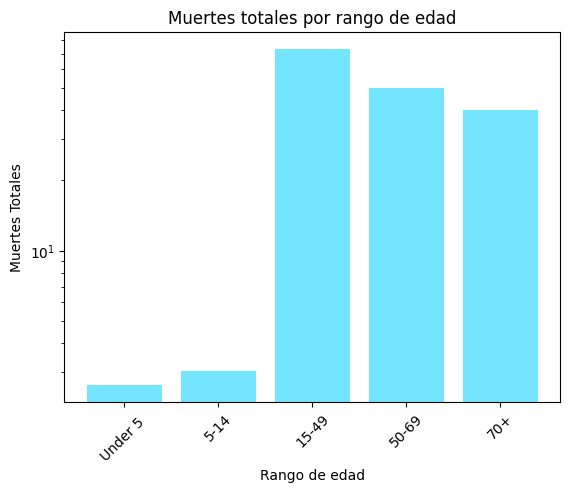

Numero de muertes:  2.6478236085030913
Numero de muertes:  3.046211651338071
Numero de muertes:  73.41140442371065
Numero de muertes:  49.89211925908532
Numero de muertes:  40.249227753752464


In [19]:
label = ['Under 5 ', '5-14', '15-49', '50-69','70+']
muertes = [mispaises["Deaths_Under5"].sum(),mispaises["Deaths_5_14"].sum(),mispaises["Deaths_15_49"].sum(),mispaises["Deaths_50_69"].sum(), mispaises["Deaths_70"].sum()]
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

# Colocamos una etiqueta en el eje Y
ax.set_ylabel('Muertes Totales')

# Colocamos una etiqueta en el eje X
ax.set_xlabel("Rango de edad")
plt.xticks(rotation = 45)
# Colocamos un título para la grafica
ax.set_title('Muertes totales por rango de edad')

# Creamos la grafica de barras utilizando el año como eje x y las muertes
# como eje y.
plt.bar(label, muertes, color = "#73E5FF")
plt.yscale("log")
# Finalmente mostramos la grafica con el metodo show()
plt.show()
for i in range(5):
  print("Numero de muertes: ", muertes[i])

In [20]:
mispaises.groupby("Entity").aggregate(
    {
        "Population_70":"last",
        "Deaths_70": "sum"
    }
)

,Population_70,Deaths_70
Entity,,
Argentina,2287638.000,30.020763
Azerbaijan,526399.845,10.017625
Belize,17955.000,0.210839


In [21]:
mispaises[mispaises["Entity"] == "Argentina"]["Deaths_70"].sum()

30.02076337897539

In [22]:
from math import sqrt
from scipy.stats import norm

labels = ["Under 5", "5 to 14", "15 to 49", "50 to 69", "more than 70"]
estadistico_prueba =[]
pValue =[]
for i in range(5):
  for j in range(i+1,5):
    m = mispaises.iloc[19,i+12]+mispaises.iloc[41,i+12]+mispaises.iloc[55,i+12]
    print("Tamaño de muestra m para población ",labels[i],": ", m)
    n = mispaises.iloc[19,j+12]+mispaises.iloc[41,j+12]+mispaises.iloc[55,j+12]
    print("Tamaño de muestra n para población", labels[j],": ", n)
    X = mispaises.iloc[:,i+17].sum()
    Y = mispaises.iloc[:,j+17].sum()
    print("Número de muertes en población",labels[i],": ", X)
    print("Número de muertes en población ",labels[j],": ", Y)
    proporcion1 = X/m
    proporcion2 = Y/n
    print("Proporción de éxitos en población",labels[i],": ", proporcion1)
    print("Proporción de éxitos en población",labels[j],": ", proporcion2)
    exitos = (X+Y)/(m+n)
    fracasos = 1-exitos
    print("Proporción de exitos: ", exitos)
    print("Proporción de fracasos: ", fracasos)
    z = (proporcion1 - proporcion2) / sqrt(exitos*fracasos*(1/m+1/n))
    print(" z = ", z)
    valorP = 2 * (1 - norm.cdf(abs(z),loc=0,scale=1))
    pValue.append(valorP)
    print("Valor de P: ", valorP)
    print("\n")

    estadistico_prueba.append(z)

print(estadistico_prueba)

Tamaño de muestra m para población  Under 5 :  4322515.395
Tamaño de muestra n para población 5 to 14 :  8346926.28
Número de muertes en población Under 5 :  2.6478236085030913
Número de muertes en población  5 to 14 :  3.046211651338071
Proporción de éxitos en población Under 5 :  6.125654547271061e-07
Proporción de éxitos en población 5 to 14 :  3.6495010847730536e-07
Proporción de exitos:  4.4943063837429614e-07
Proporción de fracasos:  0.9999995505693616
 z =  0.6233028919262045
Valor de P:  0.5330854977554762


Tamaño de muestra m para población  Under 5 :  4322515.395
Tamaño de muestra n para población 15 to 49 :  25040778.84
Número de muertes en población Under 5 :  2.6478236085030913
Número de muertes en población  15 to 49 :  73.41140442371065
Proporción de éxitos en población Under 5 :  6.125654547271061e-07
Proporción de éxitos en población 15 to 49 :  2.9316741660784004e-06
Proporción de exitos:  2.5902825283667883e-06
Proporción de fracasos:  0.9999974097174716
 z =  -2.76

In [23]:
from math import sqrt
from scipy.stats import norm

labels = ["debajo de 5 años", "entre 5 y 14 años", "entre 15 y 49 y", "entre 50 y 69 años", "mayores de 70 años"]
estadistico_prueba =[]
pValue =[]
muestras = [5056805.922,9764866.608,29294599.82,10694853.9,3313079.742]
for i in range(5):
  for j in range(i+1,5):
    m = muestras[i]
    print("Tamaño de muestra para población",labels[i],": m = ", m)
    n = muestras[j]
    print("Tamaño de muestra para población", labels[j],": n = ", n)
    X = mispaises.iloc[:,i+17].sum()
    Y = mispaises.iloc[:,j+17].sum()
    print("Número de muertes en población",labels[i],": X = ", X)
    print("Número de muertes en población",labels[j],": Y = ", Y)
    proporcion1 = X/m
    proporcion2 = Y/n
    print("Proporción de éxitos en población",labels[i],": ", proporcion1)
    print("Proporción de éxitos en población",labels[j],": ", proporcion2)
    exitos = (X+Y)/(m+n)
    fracasos = 1-exitos
    print("Proporción de éxitos promedio: ", exitos)
    print("Proporción de fracasos promedio: ", fracasos)
    z = (proporcion1 - proporcion2) / sqrt(exitos*fracasos*(1/m+1/n))
    print("Estadístico de prueba: z = ", z)
    valorP = 2 * (1 - norm.cdf(abs(z),loc=0,scale=1))
    pValue.append(valorP)
    print("Valor de P: ", valorP)
    print("\n")

    estadistico_prueba.append(z)


Tamaño de muestra para población debajo de 5 años : m =  5056805.922
Tamaño de muestra para población entre 5 y 14 años : n =  9764866.608
Número de muertes en población debajo de 5 años : X =  2.6478236085030913
Número de muertes en población entre 5 y 14 años : Y =  3.046211651338071
Proporción de éxitos en población debajo de 5 años :  5.236158257495196e-07
Proporción de éxitos en población entre 5 y 14 años :  3.119562994175897e-07
Proporción de éxitos promedio:  3.841695495778952e-07
Proporción de fracasos promedio:  0.9999996158304504
Estadístico de prueba: z =  0.623302871587483
Valor de P:  0.5330855111183725


Tamaño de muestra para población debajo de 5 años : m =  5056805.922
Tamaño de muestra para población entre 15 y 49 y : n =  29294599.82
Número de muertes en población debajo de 5 años : X =  2.6478236085030913
Número de muertes en población entre 15 y 49 y : Y =  73.41140442371065
Proporción de éxitos en población debajo de 5 años :  5.236158257495196e-07
Proporción de 